# Lab #2
#### Billy Parmenter - 7526387
## Part A

In [1]:
#imports
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from scipy import stats

lab2_csv_path = '../../practical_labs/Lab2_dataset.csv'
airbnb_csv_path = '../../practical_labs/AB_NYC_2019.csv'

In [2]:
def get_part_A_data(path):
  data = pd.read_csv(path, header=0, names=['index','label', 'text', 'label_num'], index_col='index')
  data = data.sort_index()
  return data

In [3]:
def clean_text(text): 
  tokens = word_tokenize(text)
  
  tokens = [w.lower() for w in tokens]
  
  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in tokens]
  
  words = [word for word in stripped if word.isalpha()]
  
  stop_words = set(stopwords.words('english'))
  words = [w for w in words if not w in stop_words]
  
  return " ".join(words)

In [4]:
def get_part_A_clean_data(path):
  data = pd.read_csv(path, header=0, names=['index','label', 'text', 'label_num'], index_col='index')
  data = data.sort_index()
  data['text'] = data['text'].apply(clean_text)
  return data

In [5]:
def split_data(data):
  matrix = CountVectorizer(max_features=1000)
  X = matrix.fit_transform(data['text']).toarray()
  y = data.iloc[:, 0]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

In [6]:
def evaluate_model(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  cr = classification_report(y_test, y_pred)

  accuracy = accuracy_score(y_test, y_pred)

  sns.heatmap(cm.T, square=True, annot=True, fmt='d')
  plt.xlabel('true label')
  plt.ylabel('predicted label');
  print(cr, "Accuracy: ", accuracy)

In [7]:
def fit_model(model, X_train, y_train):
  model.fit(X_train, y_train)
  return model

In [8]:
def classify(model, data):
  X_train, X_test, y_train, y_test = split_data(data)
  model = fit_model(model, X_train, y_train)
  y_pred = model.predict(X_test)
  evaluate_model(y_test, y_pred)

In [9]:
dirty_data = get_part_A_data(lab2_csv_path)
clean_data = get_part_A_clean_data(lab2_csv_path)

### Multinomial

              precision    recall  f1-score   support

         ham       0.97      0.93      0.95       718
        spam       0.86      0.93      0.89       317

    accuracy                           0.93      1035
   macro avg       0.91      0.93      0.92      1035
weighted avg       0.93      0.93      0.93      1035
 Accuracy:  0.9314009661835749


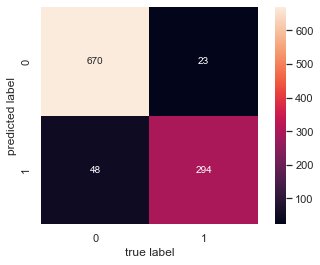

In [10]:
classify(MultinomialNB(), dirty_data)

              precision    recall  f1-score   support

         ham       0.96      0.94      0.95       718
        spam       0.87      0.91      0.89       317

    accuracy                           0.93      1035
   macro avg       0.91      0.92      0.92      1035
weighted avg       0.93      0.93      0.93      1035
 Accuracy:  0.9304347826086956


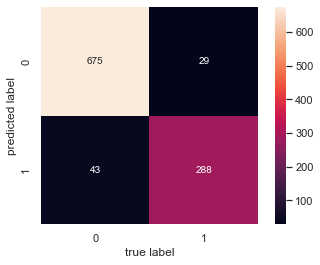

In [11]:
classify(MultinomialNB(), clean_data)

### Gaussian

              precision    recall  f1-score   support

         ham       0.99      0.94      0.96       718
        spam       0.88      0.97      0.93       317

    accuracy                           0.95      1035
   macro avg       0.93      0.96      0.94      1035
weighted avg       0.96      0.95      0.95      1035
 Accuracy:  0.9516908212560387


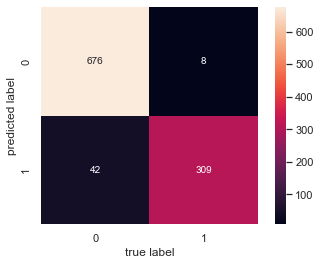

In [12]:
classify(GaussianNB(), dirty_data)

              precision    recall  f1-score   support

         ham       0.99      0.93      0.96       718
        spam       0.86      0.97      0.91       317

    accuracy                           0.94      1035
   macro avg       0.92      0.95      0.93      1035
weighted avg       0.95      0.94      0.94      1035
 Accuracy:  0.9420289855072463


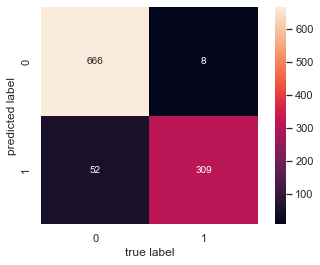

In [13]:
classify(GaussianNB(), clean_data)

### Observations
I decided to also evaluate dirty vs clean data for both Multinomial and Gaussian calssification.

Bassed on accuracy and recal I would suggest using Gaussian with, surprisingly, dirty data.

## Part B

In [14]:
def get_part_B_data(path):
  data = pd.read_csv(path, header=0)
  data = data.rename_axis('index')

  return data

In [15]:
def detect_outliers(method, data, threshold):
    match method:
        case "mean":
            mean = np.mean(data)
            std = np.std(data)
            return data[abs(data - mean) > threshold * std]
            
        case "median":
            median = np.median(data)
            mad = np.median(np.abs(data - np.median(data, axis=0)), axis=0)
            return data[np.abs(data - median) > threshold * mad]
        
        case "percentile":
            percentile = np.percentile(data, threshold, axis=0)
            return data[data > percentile]

In [16]:
data = get_part_B_data(airbnb_csv_path)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
index,,,,,,,,,,,,,,,,
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<Axes: >

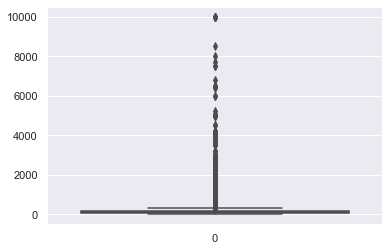

In [17]:
sns.boxplot(data.price)

767


<Axes: >

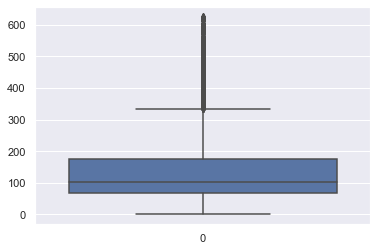

In [18]:

mean_outlier_indexes = detect_outliers("mean", data.price, 2)
mean_cleaned_data = data.drop(mean_outlier_indexes.index)

print(len(mean_outlier_indexes))
sns.boxplot(mean_cleaned_data.price)

6485


<Axes: >

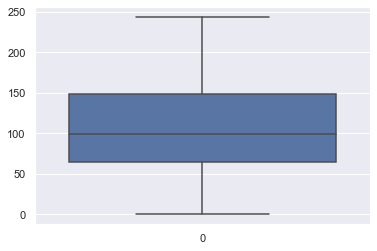

In [19]:
median_outlier_indexes = detect_outliers("median", data.price, 3)
median_cleaned_data = data.drop(median_outlier_indexes.index)

print(len(median_outlier_indexes))
sns.boxplot(median_cleaned_data.price)

4878


<Axes: >

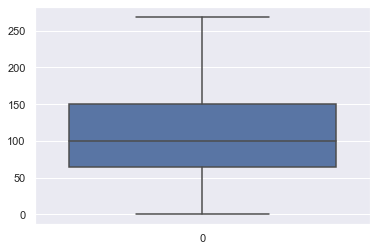

In [20]:
percentile_outlier_indexes = detect_outliers("percentile", data.price, 90)
percentile_cleaned_data = data.drop(percentile_outlier_indexes.index)

print(len(percentile_outlier_indexes))
sns.boxplot(percentile_cleaned_data.price)

Because the data is skewed the median method is not reliable. Median and percentile both work much better, median at threshold of 3 and percentile at 90%. Although I would suggest percentile because at the 90% threshold it removes all outliers and less non-outlier data points than median.